# Mental Health Disorder Analysis

source: <a href='https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder'>Kaggle: Global Trends in Mental Health Disorder</a>

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv = pd.read_csv("dataset/Mental health Depression disorder Data.csv", nrows=6468)
df = pd.DataFrame(csv)

In [3]:
df.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [4]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(df, how='left', left_on='BRK_A3', right_on='Code')

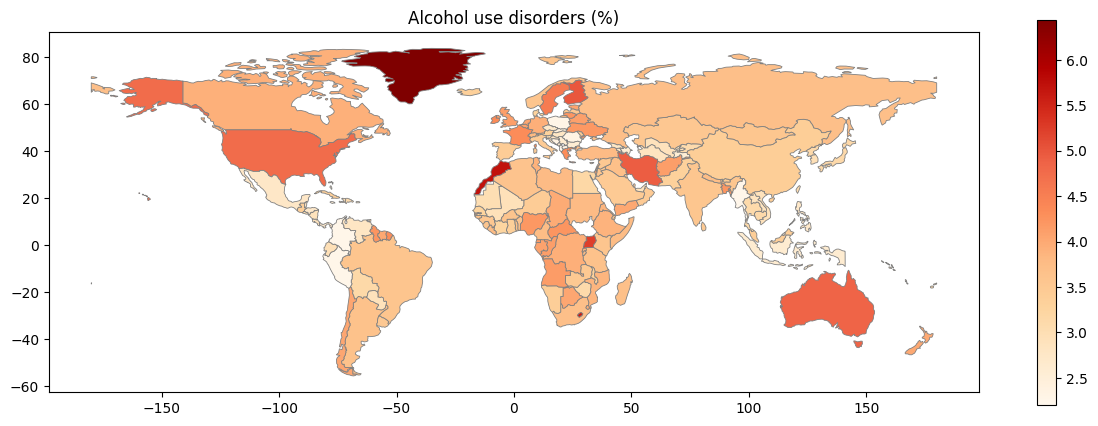

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))

merged.plot(column='Depression (%)', cmap='OrRd', linewidth=0.6, ax=ax, edgecolor='0.5', legend=True)

plt.title('Alcohol use disorders (%)')
plt.show()


In [17]:
df.value_counts(df['Year']).sort_index()

Year
1990    231
1991    231
1992    231
1993    231
1994    231
1995    231
1996    231
1997    231
1998    231
1999    231
2000    231
2001    231
2002    231
2003    231
2004    231
2005    231
2006    231
2007    231
2008    231
2009    231
2010    231
2011    231
2012    231
2013    231
2014    231
2015    231
2016    231
2017    231
Name: count, dtype: int64

In [24]:
df_2009 = df[df['Year'] == 2009]
df_2009.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
19,19,Afghanistan,AFG,2009,0.164932,0.704925,0.095166,4.861533,2.543884,4.129972,0.661185
47,47,Albania,ALB,2009,0.198905,0.702783,0.157738,3.391018,0.498324,2.206033,1.824955
75,75,Algeria,DZA,2009,0.196795,0.814617,0.202695,5.037067,1.654478,3.616783,0.661914
103,103,American Samoa,ASM,2009,0.249748,0.468359,0.180675,3.312584,0.763178,2.937727,1.134180
131,131,Andean Latin America,NaN,2009,0.198671,0.879161,0.331577,4.259968,0.670636,2.607964,1.590828


In [26]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(df_2009, how='left', left_on='BRK_A3', right_on='Code')

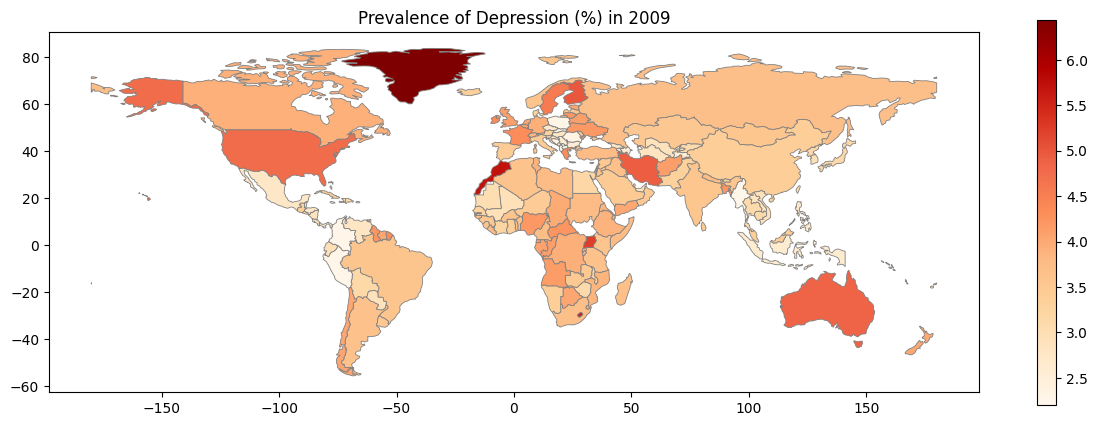

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))

merged.plot(column='Depression (%)', cmap='OrRd', linewidth=0.6, ax=ax, edgecolor='0.5', legend=True)

plt.title('Prevalence of Depression (%) in 2009')
plt.show()